# Digital image and signal processing

## Exercise 4

The aim of the exercise is to test the effect of filters in practice to eliminate unwanted interference from the ECG signal. Please select the type of filter to experiment, e.g. Butterworth or Chebyshev. For filtering, use ready-made functions from the `scipy.signal` library. The library also has functions to assist in designing filters that can be applied.

### Authors

- Kinga Marek
- Mariusz Wiśniewski

### Task 1  

Read the *ekg_noise.txt* signal and notice the noise superimposed on the signal. Plot the frequency amplitude characteristics of the signal.

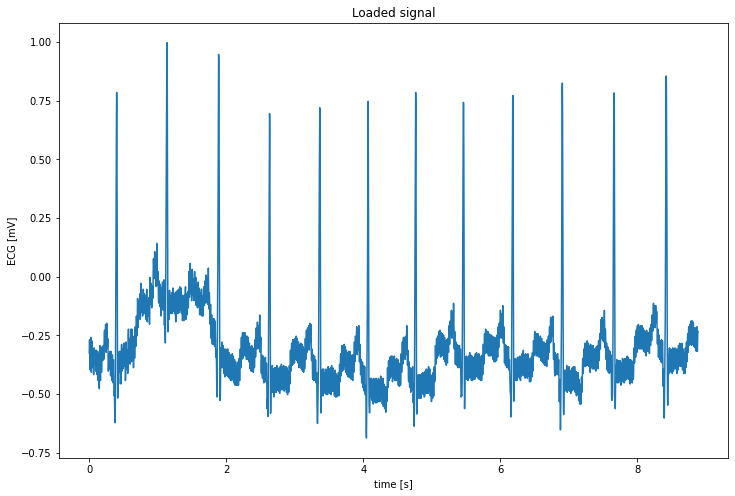

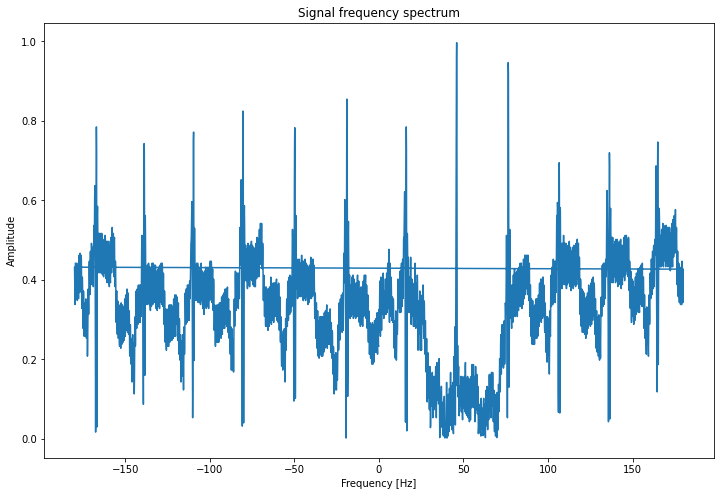

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fs = 360
data = np.loadtxt('../data/ekg_noise.txt')
data = np.hsplit(data, 2)

plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(data[0], data[1])
plt.xlabel('time [s]')
plt.ylabel('ECG [mV]')
plt.title('Loaded signal')
plt.show()

fft_amplitude = np.abs(np.fft.fft(data[1]))
fft_freq = np.fft.fftfreq(len(data[1]), 1/fs)

plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(fft_freq, fft_amplitude)
plt.title('Signal frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

### Task 2

Examine a low-pass filter with a cutoff frequency of 60 Hz to reduce mains noise. Determine the filter parameters, plot its characteristics (the dependence of the attenuation on the frequency), the course of the signal after filtration and its spectrum. It is also possible to determine the difference between the signal before and after filtering and the spectrum of this difference.

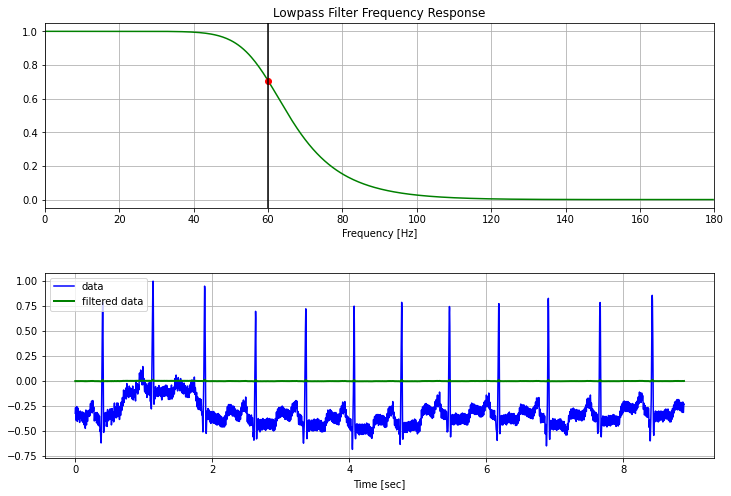

In [2]:
from scipy.signal import butter, lfilter, freqz


def butter_coefficients(cutoff, fs, btype, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return b, a


def butter_filter(data, cutoff, fs, btype, order=5):
    b, a = butter_coefficients(cutoff, fs, btype, order=order)
    y = lfilter(b, a, data)
    return y


# filter requirements
fs = 360.0
cutoff = 60

# Get the filter coefficients so we can check its frequency response.
b, a = butter_coefficients(cutoff, fs, 'lowpass')

# Plot the frequency response.
# Compute the frequency response of a digital filter.
w, h = freqz(b, a)
plt.subplot(2, 1, 1)
# w from freqz is in radians/sample,
# so in order to get Hz we need to
# multiply it by 1/(2*np.pi)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'g')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ro')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title('Lowpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.grid()

# Demonstrate the use of the filter.
lowpass_filtered_y = butter_filter(data[1], cutoff, fs, 'lowpass')

plt.subplot(2, 1, 2)
plt.plot(data[0], data[1], 'b-', label='data')
plt.plot(data[0], lowpass_filtered_y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

### Task 3

Then apply, to the signal obtained in [task 2](#task-2), a high-pass filter with a cut-off frequency of 5 Hz to eliminate floating isoelectric lines. Make the signal graphs as in [task 2](#task-2).

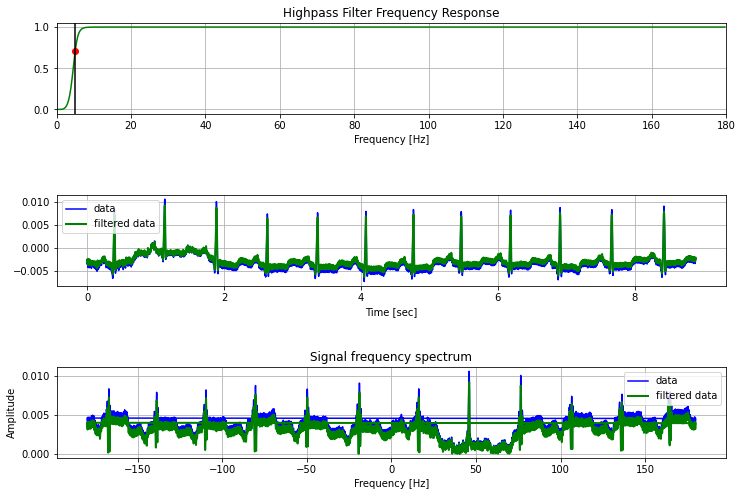

In [3]:
# Change some filter requirements
cutoff = 5

# Get the filter coefficients so we can check its frequency response.
b, a = butter_coefficients(cutoff, fs, 'highpass')

plt.subplots_adjust(hspace=0.9)
plt.rcParams['figure.figsize'] = [10, 8]

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(3, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'g')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ro')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title('Highpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.grid()

# Demonstrate the use of the filter.
double_filtered_y = butter_filter(lowpass_filtered_y, cutoff, fs, 'highpass')

plt.subplot(3, 1, 2)
plt.plot(data[0], lowpass_filtered_y, 'b-', label='data')
plt.plot(data[0], double_filtered_y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

fft_amplitude2 = np.abs(np.fft.fft(double_filtered_y))
fft_amplitude2_diff = np.abs(np.fft.fft(lowpass_filtered_y))

plt.subplot(3, 1, 3)
plt.plot(fft_freq, fft_amplitude2_diff, 'b-', label='data')
plt.plot(fft_freq, fft_amplitude2, 'g-', linewidth=2, label='filtered data')
plt.title('Signal frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.show()